# FLOW ZONE INDICATOR (FZI) CORRELATION TO WIRELINE LOGS: a regression problem
## A Test Case: Manyberries, AB

Kevin Fossenier, April 22/2021


## THE PROBLEM


For oil and gas exploration and development, the ability to determine the reservoir's capacity to flow oil or gas is the ultimate goal for those charged with finding hydrocarbons.  These are determined through a variety of methods, but for Geologists, the primary tools  are wireline logs and core analysis.  Core analysis is less common so wireline logs are usually the only available tool.  The study area used to test this prediciton is Manyberries, located in SE Alberta (Figure 1).  The oil pool produces from Cretaceous clastic sediments.  However, this study could have been applied to almost any pool with sufficient core data to build an FZI model.  The wireline log below (Figure 2) is a representation of a typical log for this study area (Figure 1).  Core data can be converted into a useful measurement, FZI, that is a quantifiable measure of the reservoir's flow capacity.  It uses core analysis data (i.e. permeability and porosity) and is calculated: 
    
    FZI = (0.0314 * sqrt(permeability/porosity)) / (porosity/(1-porosity). (#1)

In this instance , permeability is a measure of the flow capacity, measured in millidarcies (mD) and porosity is the measure of the open pore space in the rock.  Core data is not commonly collected for a drilled well, mainly due to substantial increased costs.  For this reason, Geologists rely on wireline logs for the bulk of their reservoir model data.  The problem is that wireline data does not measure permeability directly and porosity resolution is averaged of centimetre to 10's of centimetre scale.  Core data measures permeability directly and porosity can be calculated easily at a centimetre scale.  Core data, where present is typically integrated into the wireline data and then porosity - permeability relationships are approximated using simple crossplots.  These relationships usually have a high degree of error because the relationships are usually not linear.  Building a reliable prediction model to calculate FZI with only wireline data could make the reservoir model far more accurate while still allowing companies to keep costs down from limiting the number of core samples they acquire over a reservoir.  A better model saves the company money by allowing it to make business decisions with more accurate data.  By accurately identifying areas that are likely less productive and therefore, uneconomic, that company can deploy its capital more cost effectively.  

This use case dataset was supplied by a former colleague P. Stevenson (calculated FZI and binned the vales) and that data was acquired from publicly available oil and gas repositories with the Alberta government.  Third party vendors collect this data and sell it to oil and gas companies. He also provided the wireline log presentation provided below (Figure 2). 


1: https://petrowiki.spe.org/Estimating_permeability_based_on_pore_dimension

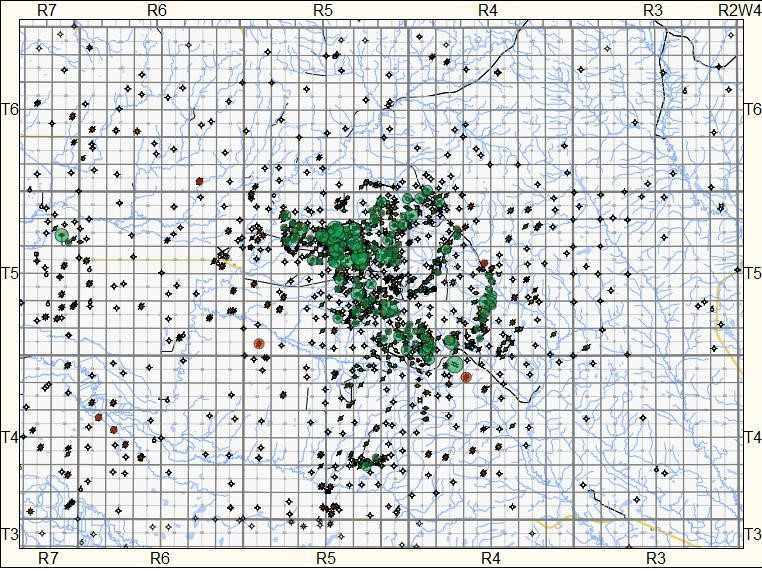

Figure 1:  Manyberries, AB, study area map for.  Green bubbles are oil production for that pool

In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [394]:
well = pd.read_csv("100042700505W400WR.csv", header=0, skiprows=[1])

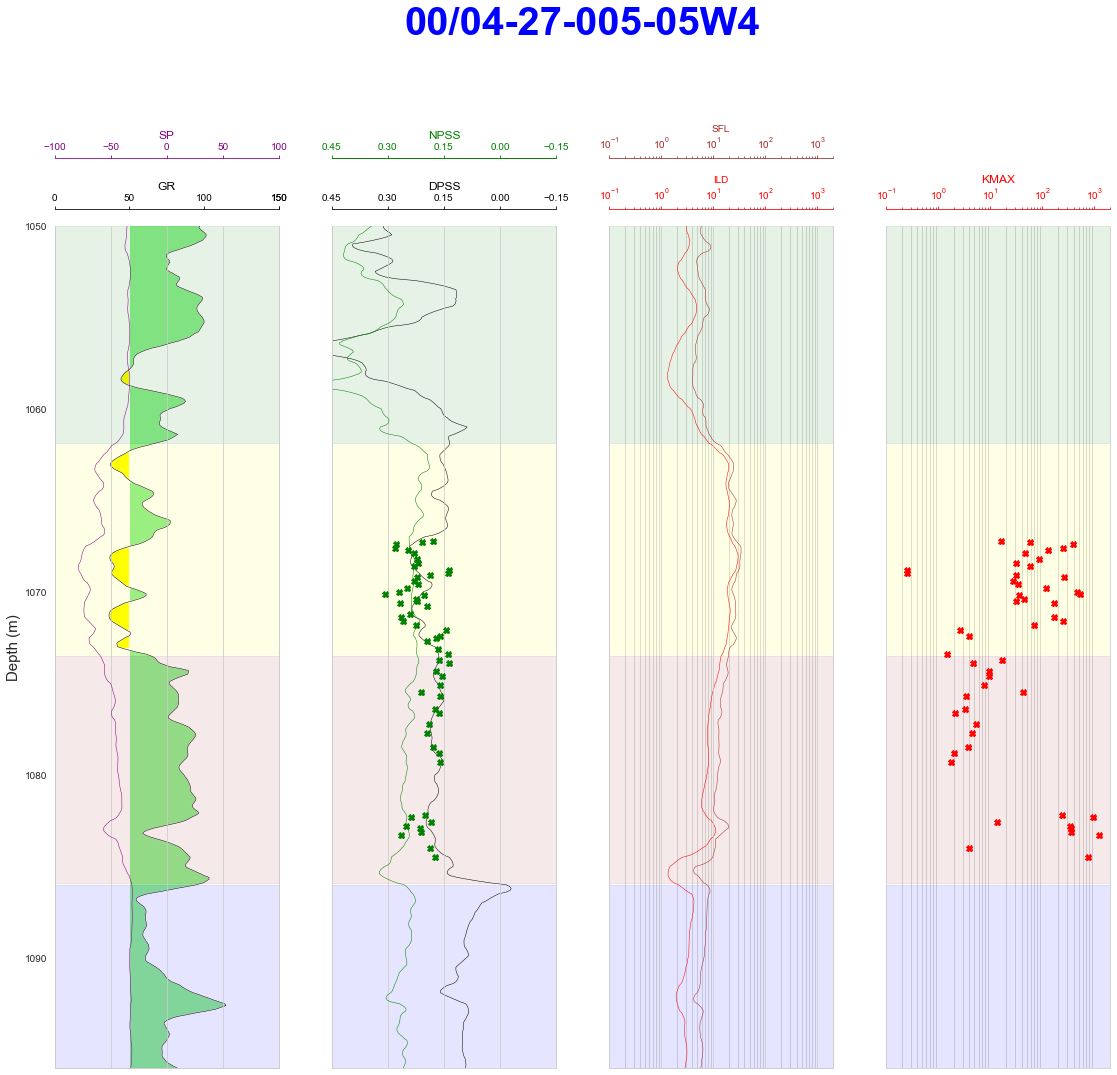

In [395]:
# Create a dictionary of formations with a top and bottom depth
formations = {"MNVL":[1050, 1061.9,], 
              "SBRS": [1062, 1073.4],
              "SWFT": [1073.5, 1085.9],
              "RRDN": [1086, 1096],}
              

# Select the same number of colours as there are formations
zone_colours = ["green", "yellow", "brown", "blue"]
              
fig, ax = plt.subplots(figsize=(20,50))

#Set up the plot axes
ax1 = plt.subplot2grid((4,5), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((4,5), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((4,5), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((4,5), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax1.twiny()
ax6 = ax2.twiny()
ax7 = ax3.twiny()

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well, color = "black", linewidth = 0.5)
ax1.set_xlabel("GR",fontsize = 12)
ax1.xaxis.label.set_color("black")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (m)", fontsize=15)
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
ax1.title.set_color('black')#assign title color
ax1.fill_betweenx(well["DEPTH"],well["GR"], 50, where = (well["GR"]<=50),facecolor='yellow')# this defines <50 Gr Api cutoff
ax1.fill_betweenx(well["DEPTH"],well["GR"], 50, where = (well["GR"]>=50),facecolor='lightgreen')# this defines >50 Gr Api cutoff
ax1.set_xticks([0, 50, 100, 150, 150])#assign x ticks with values

# Density track
ax2.plot("DPSS", "DEPTH", data = well, color = "black", linewidth = 0.5)
ax2.set_xlabel("DPSS",fontsize = 12)
ax2.set_xlim(.45,-.15)
ax2.xaxis.label.set_color("black")
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("black")
ax2.set_xticks([.45, .30, .15, 0,-.15])#assign x ticks with values

# Resistivity track
ax3.plot("ILD", "DEPTH", data = well, color = "red", linewidth = 0.5)
ax3.set_xlabel("ILD",fontsize = 10)
ax3.set_xlim(0.2, 2000)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([0.1, 1, 10, 100, 1000])
ax3.semilogx()#log scale 

# Permeability track
ax4.plot("KMAX", "DEPTH", data = well, color = "red", linewidth = 0, marker= 'X')
ax4.set_xlabel("KMAX",fontsize = 12)
ax4.set_xlim(0.2, 2000)
ax4.xaxis.label.set_color("red")
ax4.tick_params(axis='x', colors="red")
ax4.spines["top"].set_edgecolor("red")
ax4.set_xticks([0.1, 1, 10, 100, 1000])
ax4.semilogx()#log scale 


# SP track placed ontop of density track
ax5.plot("SP", "DEPTH", data = well, color = "purple", linewidth = 0.5)
ax5.set_xlabel('SP',fontsize = 12)
ax5.xaxis.label.set_color("purple")
ax5.set_xlim(-100, 100)
ax5.tick_params(axis='x', colors="purple")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("purple")
ax5.set_xticks([-100,-50,0,50,100])

# COREPHI track placed ontop of density track
ax6.plot("COREPHI", "DEPTH", data = well, color = "green", marker= 'X', linewidth = 0)
ax6.set_xlabel('COREPHI',fontsize = 12)
ax6.xaxis.label.set_color("green")
ax6.set_xlim(0.45, -0.15)
ax6.tick_params(axis='x', colors="green")
ax6.spines["bottom"].set_position(("axes", 1.08))
ax6.spines["bottom"].set_visible(True)
ax6.spines["bottom"].set_edgecolor("green")
ax6.set_xticks([0.45, .30, 0.15, 0, -0.15])

# Neutron track placed ontop of density track
ax6.plot("NPSS", "DEPTH", data = well, color = "green", linewidth = 0.5)
ax6.set_xlabel('NPSS',fontsize = 12)
ax6.xaxis.label.set_color("green")
ax6.set_xlim(0.45, -0.15)
ax6.tick_params(axis='x', colors="green")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.spines["top"].set_edgecolor("green")
ax6.set_xticks([0.45, .30, 0.15, 0, -0.15])

# Shallow focused resistivity on top of ild track
ax7.plot("SFL", "DEPTH", data = well, color = "brown", linewidth = 0.5)
ax7.set_xlabel("SFL",fontsize = 10)
ax7.set_xlim(0.2, 2000)
ax7.xaxis.label.set_color("brown")
ax7.tick_params(axis='x', colors="brown")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_edgecolor("brown")
ax7.set_xticks([0.1, 1, 10, 100, 1000])
ax7.semilogx()



# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1,ax2,ax3,ax4]:#defines which axis' are involved in the loop
    ax.set_ylim(1096, 1050)#assign depth limits
    ax.grid(which='major', color='lightgrey', linestyle='-')#assign grid color for major 
    ax.grid(which='minor', color='lightgrey', linestyle='-')#assign grid color for minor
    ax.xaxis.set_ticks_position("top")#assign tick position to top
    ax.xaxis.set_label_position("top")#assign tick label position to top
    ax.spines["top"].set_position(("axes", 1.02)) #assign label position at 1.02 above top
    
# loop through the formations dictionary and zone colours
    for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)# this line references the dictonary of formations
        
for ax in [ax2,ax3,ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)#shuts off depth tick labels 
    
plt.tight_layout(pad=3)# pad adjusts distance from figure edge to edges of subplots

fig.suptitle("00/04-27-005-05W4", x= .42, y= 1.03, fontsize=40, fontweight='bold', color='blue')

plt.savefig('04-27-5-5W5.pdf', bbox_inches='tight', dpi=150,) # saves plot to an output at a certain dpi resolution


Figure 2:  Wireline log for the Manyberries area (graphic representation from P. Stevenson)

## METHODOLOGY¶

### DATA ACQUISITION AND LOADING

In [396]:
# import pandas, matplotlib, numpy and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [397]:
# import iris dataframe
df = pd.read_csv('Manyberries_FZI_regression.csv', encoding='UTF-8')

# Note FZI was binned in another column and removed for the analysis that will be presented in another notebook

### DATA OVERVIEW

In [398]:
# plot first (X) number of rows.  
df.head()

,UWI,FM_TOP,DEPTH,GR,SP,CALX,RHOB,DPSS,NPSS,ILD,ILM,SFL,DT,FZI_CALC
0,102081000505W400,LMNV,1112.1,46.32,-39.50,212.37,2378.71,0.17,0.31,4.24,4.24,5.89,NaN,2.21
1,102081000505W400,LMNV,1112.2,46.90,-42.00,212.85,2378.71,0.17,0.31,4.61,4.65,6.44,NaN,0.64
2,102081000505W400,LMNV,1112.6,55.67,-48.60,210.07,2405.00,0.14,0.36,6.26,6.38,7.16,NaN,4.04
3,102081000505W400,LMNV,1112.7,56.26,-50.40,206.31,2425.50,0.14,0.35,6.59,6.84,7.20,NaN,0.50
4,102081000505W400,SBRS,1115.2,56.96,-67.49,204.46,2312.50,0.23,0.25,14.71,19.37,19.28,NaN,3.24


In [399]:
# dataframe overview summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UWI       823 non-null    object 
 1   FM_TOP    823 non-null    object 
 2   DEPTH     823 non-null    float64
 3   GR        823 non-null    float64
 4   SP        823 non-null    float64
 5   CALX      802 non-null    float64
 6   RHOB      823 non-null    float64
 7   DPSS      823 non-null    float64
 8   NPSS      823 non-null    float64
 9   ILD       823 non-null    float64
 10  ILM       823 non-null    float64
 11  SFL       823 non-null    float64
 12  DT        558 non-null    float64
 13  FZI_CALC  823 non-null    float64
dtypes: float64(12), object(2)
memory usage: 90.1+ KB


In [400]:
# shape attribute - dimension of array of dataframe
df.shape

(823, 14)

There are 823 rows with 14 features.  With the exception of UWI and FM_TOP, all of the data is continuous numeric (float64).  All values except SP are positive and there appears to be missing values for DT.

Features of this dataframe include:

    1. UWI:  Unique Well Identifier.  The geographic location for a well using either the NTS or DLS survey system. 
    2. FM_TOP:  Name of the geologic formation at that depth
    3. DEPTH:  Depth of the measurement (metres)
    4. GR: Gamma Ray.  The bulk radioactivity of the formation at that depth.  
    5. SP: Spontaneous Potential.  A measure of natural potential difference between the wellbore and the surface.  The current flow created between the formation in the absence of applied current.
    6. CALX: Caliper measurement.  Measurement of the borehole in one axis (mm).
    7. RHOB:  Bulk Density.  The bulk density of the formation at that depth (g/cm3).  Measures the electron density of the rock.               
    8. DPSS: Density porosity base on a sandtone lithology being measured.  Calculated from RHOB, matrix density, density of drilling fluid and density of fluid in the reservoir.
    9. NPSS: Neutron porosity based on sandstone lithology.  Measures the hydrogen concentration in the reservoir by emitting neutrons that collide with nucleii in the formation.  Max loss occurs when neutron collides with hydrogen atom.    
    10. ILD:  Induction deep measurement (ohms).  Essentially measures the conductive or resisitive capacity of a rock by inducing an electrical field
    11. ILM: Industion medium depth measurement (ohms).  Same as ILD, but electrical field is smaller and depth of investigaton is smaller
    12. SFL: shallow focused lateralog (ohms). Same as ILD, but electrical field is the smallest of the three measurements
    13. DT: sonic interval travel time.  Measure of how fast or slow a sonic wave (compressional and shear) travels through the formation and back to the receiver.  Varies with lithology, porosity, fluid type, but primarily it is a measure of porosity.
    14. FZI_CALC: 'TARGET'.  Calculated values for Flow Zone Indicator.  
        (0.0314 * sqrt((permeability/porosity) / ((porosity/(1-porosity))).

### DATA WRANGLING

Next, we look for missing data and if there are any, deal with them either by deletion or imputing a value. In this case, the dataset is clean and there are no missing values.  If there were missing values they would either be deleted or imputed (e.g. replaced by mean, median, or specific value).

In [401]:
# check for missing values in each column and sum using pandas
df.isnull().sum()

# fill missing values with specified (X) value 
# df.fillna()

UWI           0
FM_TOP        0
DEPTH         0
GR            0
SP            0
CALX         21
RHOB          0
DPSS          0
NPSS          0
ILD           0
ILM           0
SFL           0
DT          265
FZI_CALC      0
dtype: int64

DT has far to many missing values and can not be easily imputed so the column will be removed.  CALX values generally within a narrow range and we can use the median value to replace those missing data points. The purpose of this prediciton is to predict using wireline data collected from the wellbore.  UWI, FM_TOP and DEPTH are not measured wireline data and do not generally add any information to the FZI calculation.  These can also be deleted from the dataset.

In [402]:
# replace missing values with median
df['CALX'] = df['CALX'].fillna(df['CALX'].median())

# delete column with too many missing values 
df = df.drop(columns = ['DT'])

UWI refers to the location of the well and in a more complex model, it is possible that a spatial relationship exists, given the deposition of the various components that make of that rock vary spatially.  However, there is insufficient data at this time (detailed coordinate data like lat-long) to create the spatial relationship.  In addition, it is unclear to this author how to go about the machine learning process of modelling spatial data, each having a unique input.

In [403]:
# delete not necessary to the analysis.  Others will follow further analysis
df = df.drop(columns = ['UWI', 'DEPTH'])

<AxesSubplot:xlabel='FM_TOP', ylabel='count'>

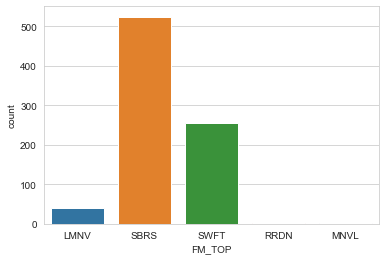

In [404]:
# Count number of each target class has occurred to assess data balance.
sns.set_style('whitegrid')
sns.countplot(x='FM_TOP', data=df)

Porosity - permeability relationships vary formation (FM_TOP), but given the small dataset and clear imbalance between the variables, it can not be used for this analysis.  With a larger dataset and a little more input variable balance, it could be a useful input for the model.

In [405]:
# FM_TOP - different zones have different porosity-permeability relationships
# it could be a factor, but unclear how to encode it - ordinal or numeric with no rank
df = df.drop(columns = ['FM_TOP'])

# confirm column changes
df.head()

,GR,SP,CALX,RHOB,DPSS,NPSS,ILD,ILM,SFL,FZI_CALC
0,46.32,-39.50,212.37,2378.71,0.17,0.31,4.24,4.24,5.89,2.21
1,46.90,-42.00,212.85,2378.71,0.17,0.31,4.61,4.65,6.44,0.64
2,55.67,-48.60,210.07,2405.00,0.14,0.36,6.26,6.38,7.16,4.04
3,56.26,-50.40,206.31,2425.50,0.14,0.35,6.59,6.84,7.20,0.50
4,56.96,-67.49,204.46,2312.50,0.23,0.25,14.71,19.37,19.28,3.24


### DESCRIPTIVE STATISTICS

Box plots are useful visualizations of the summary statistics noted above. However, they also highlight potential outliers that fall outside the 25 and 75th percentile (coloured filled box). The min and max are the noted by horizontal terminations of the lines. Outliers are typically calculated by 1.5 * interquartile range (75%-25%).  This calculation is only indicative of potential outliers and not a conclusive measurement.

The box plots for almost all inputs appear to indicate numerous outliers, but in many cases (GR, SP, CALX, ILD, SFL, ILM) including the target 'FZI_CALC', those outliers are only present above the 75th percentile.  These plots appear to indicate the data is skewed.  The others appears to be more normally distributed.

In [406]:
# basic summary stats of dataframe and defined quartiles
df.describe()

,GR,SP,CALX,RHOB,DPSS,NPSS,ILD,ILM,SFL,FZI_CALC
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,56.478676,-36.158117,203.785899,2357.049295,0.177776,0.284192,17.877412,18.812916,24.252770,2.059417
std,21.141645,40.049282,12.642993,79.898105,0.048824,0.046944,12.761298,15.992650,30.484999,1.893674
min,16.650000,-108.420000,184.750000,1958.700000,-0.230000,0.090000,1.390000,1.530000,1.820000,0.090000
25%,42.455000,-63.160000,195.495000,2305.115000,0.150000,0.260000,12.025000,12.145000,12.930000,0.760000
50%,53.470000,-44.950000,200.465000,2359.520000,0.180000,0.280000,15.270000,15.710000,17.570000,1.540000
75%,66.700000,-19.700000,208.240000,2405.970000,0.210000,0.310000,19.460000,19.820000,23.805000,2.620000
max,175.620000,82.700000,296.550000,2959.800000,0.420000,0.530000,107.210000,167.790000,420.990000,13.690000


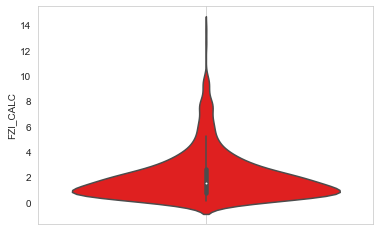

In [407]:
# violinplot plot using seaborn for the target FZI - 
# highlights the bulk of the data lies between 0.5 and 3
sns.violinplot(y=df["FZI_CALC"], color="red" );
plt.grid()
plt.show()

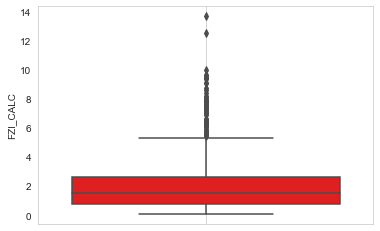

In [408]:
# box plot plot using seaborn for the target FZI
sns.boxplot(y=df["FZI_CALC"], color="red" );
plt.grid()
plt.show()

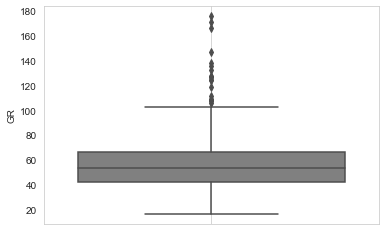

In [409]:
# box plot using seaborn for GR
sns.boxplot(y=df["GR"], color="grey" );
plt.grid()
plt.show()

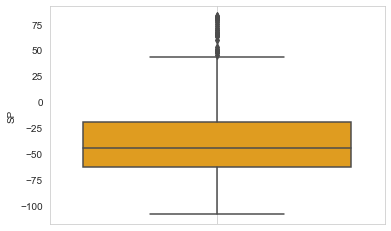

In [410]:
# box plot using seaborn for SP
sns.boxplot(y=df["SP"], color="orange" );
plt.grid()
plt.show()

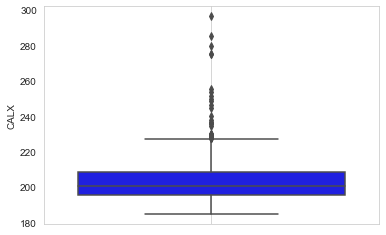

In [411]:
# box plot using seaborn for CALX
sns.boxplot(y=df["CALX"], color="blue" );
plt.grid()
plt.show()

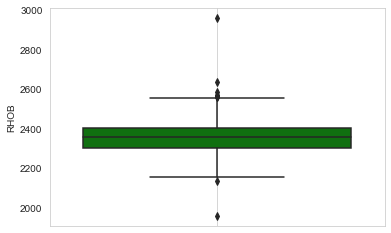

In [412]:
# box plot using seaborn for RHOB
sns.boxplot(y=df["RHOB"], color="green" );
plt.grid()
plt.show()

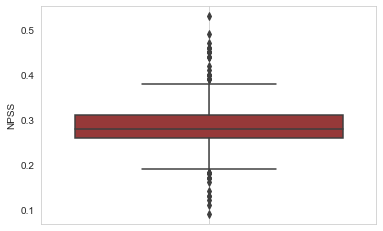

In [413]:
# box plot using seaborn for NPSS
sns.boxplot(y=df["NPSS"], color="brown" );
plt.grid()
plt.show()

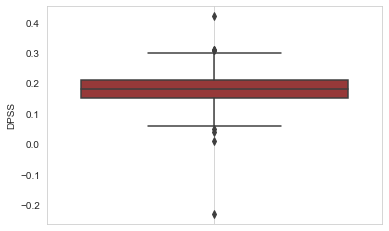

In [414]:
# box plot using seaborn for DPSS
sns.boxplot(y=df["DPSS"], color="brown" );
plt.grid()
plt.show()

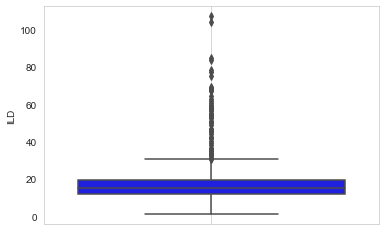

In [415]:
# box plot using seaborn for ILD
sns.boxplot(y=df["ILD"], color="blue" );
plt.grid()
plt.show()

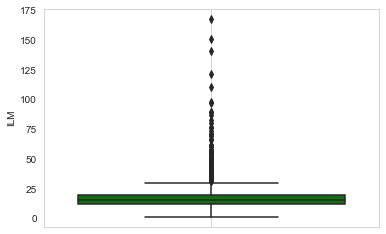

In [416]:
# box plot using seaborn for ILM
sns.boxplot(y=df["ILM"], color="green" );
plt.grid()
plt.show()

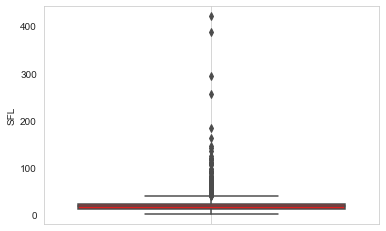

In [417]:
# box plot using seaborn for SFL
sns.boxplot(y=df["SFL"], color="red" );
plt.grid()
plt.show()

In [1]:
# clean up obvious outliers


### BIVARIATE & UNIVARIATE ANALYSIS

array([[<AxesSubplot:title={'center':'GR'}>,
        <AxesSubplot:title={'center':'SP'}>,
        <AxesSubplot:title={'center':'CALX'}>],
       [<AxesSubplot:title={'center':'RHOB'}>,
        <AxesSubplot:title={'center':'DPSS'}>,
        <AxesSubplot:title={'center':'NPSS'}>],
       [<AxesSubplot:title={'center':'ILD'}>,
        <AxesSubplot:title={'center':'ILM'}>,
        <AxesSubplot:title={'center':'SFL'}>],
       [<AxesSubplot:title={'center':'FZI_CALC'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

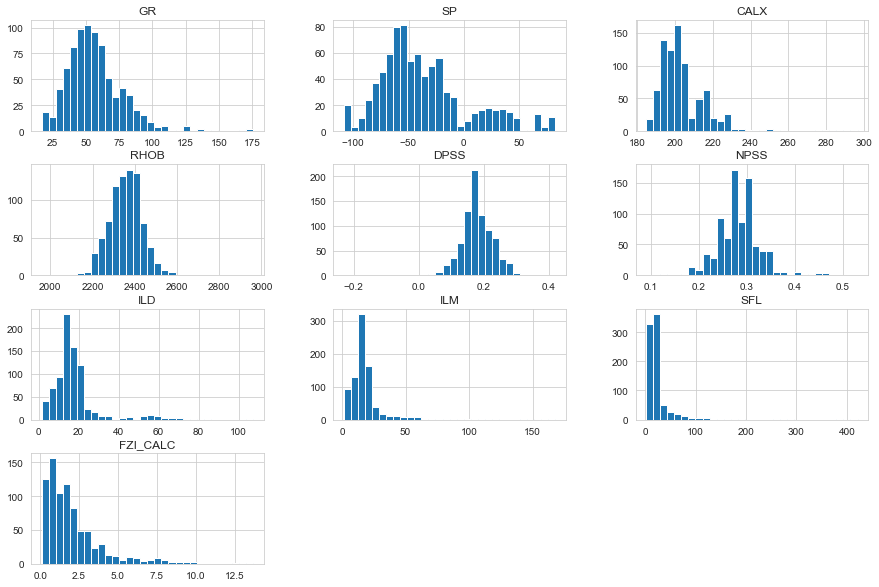

In [419]:
# more detailed look at the Univariate plots
df.hist(bins=30, figsize=(15,10))

Distributions of the data are fairly skewed, particularly the target FZI_CALC, ILD, ILM, SFL.  GR and CALX appear to be normal with a small number of outlier stretching the distribution.  SP  appears to be skewed to possibly bimodal.

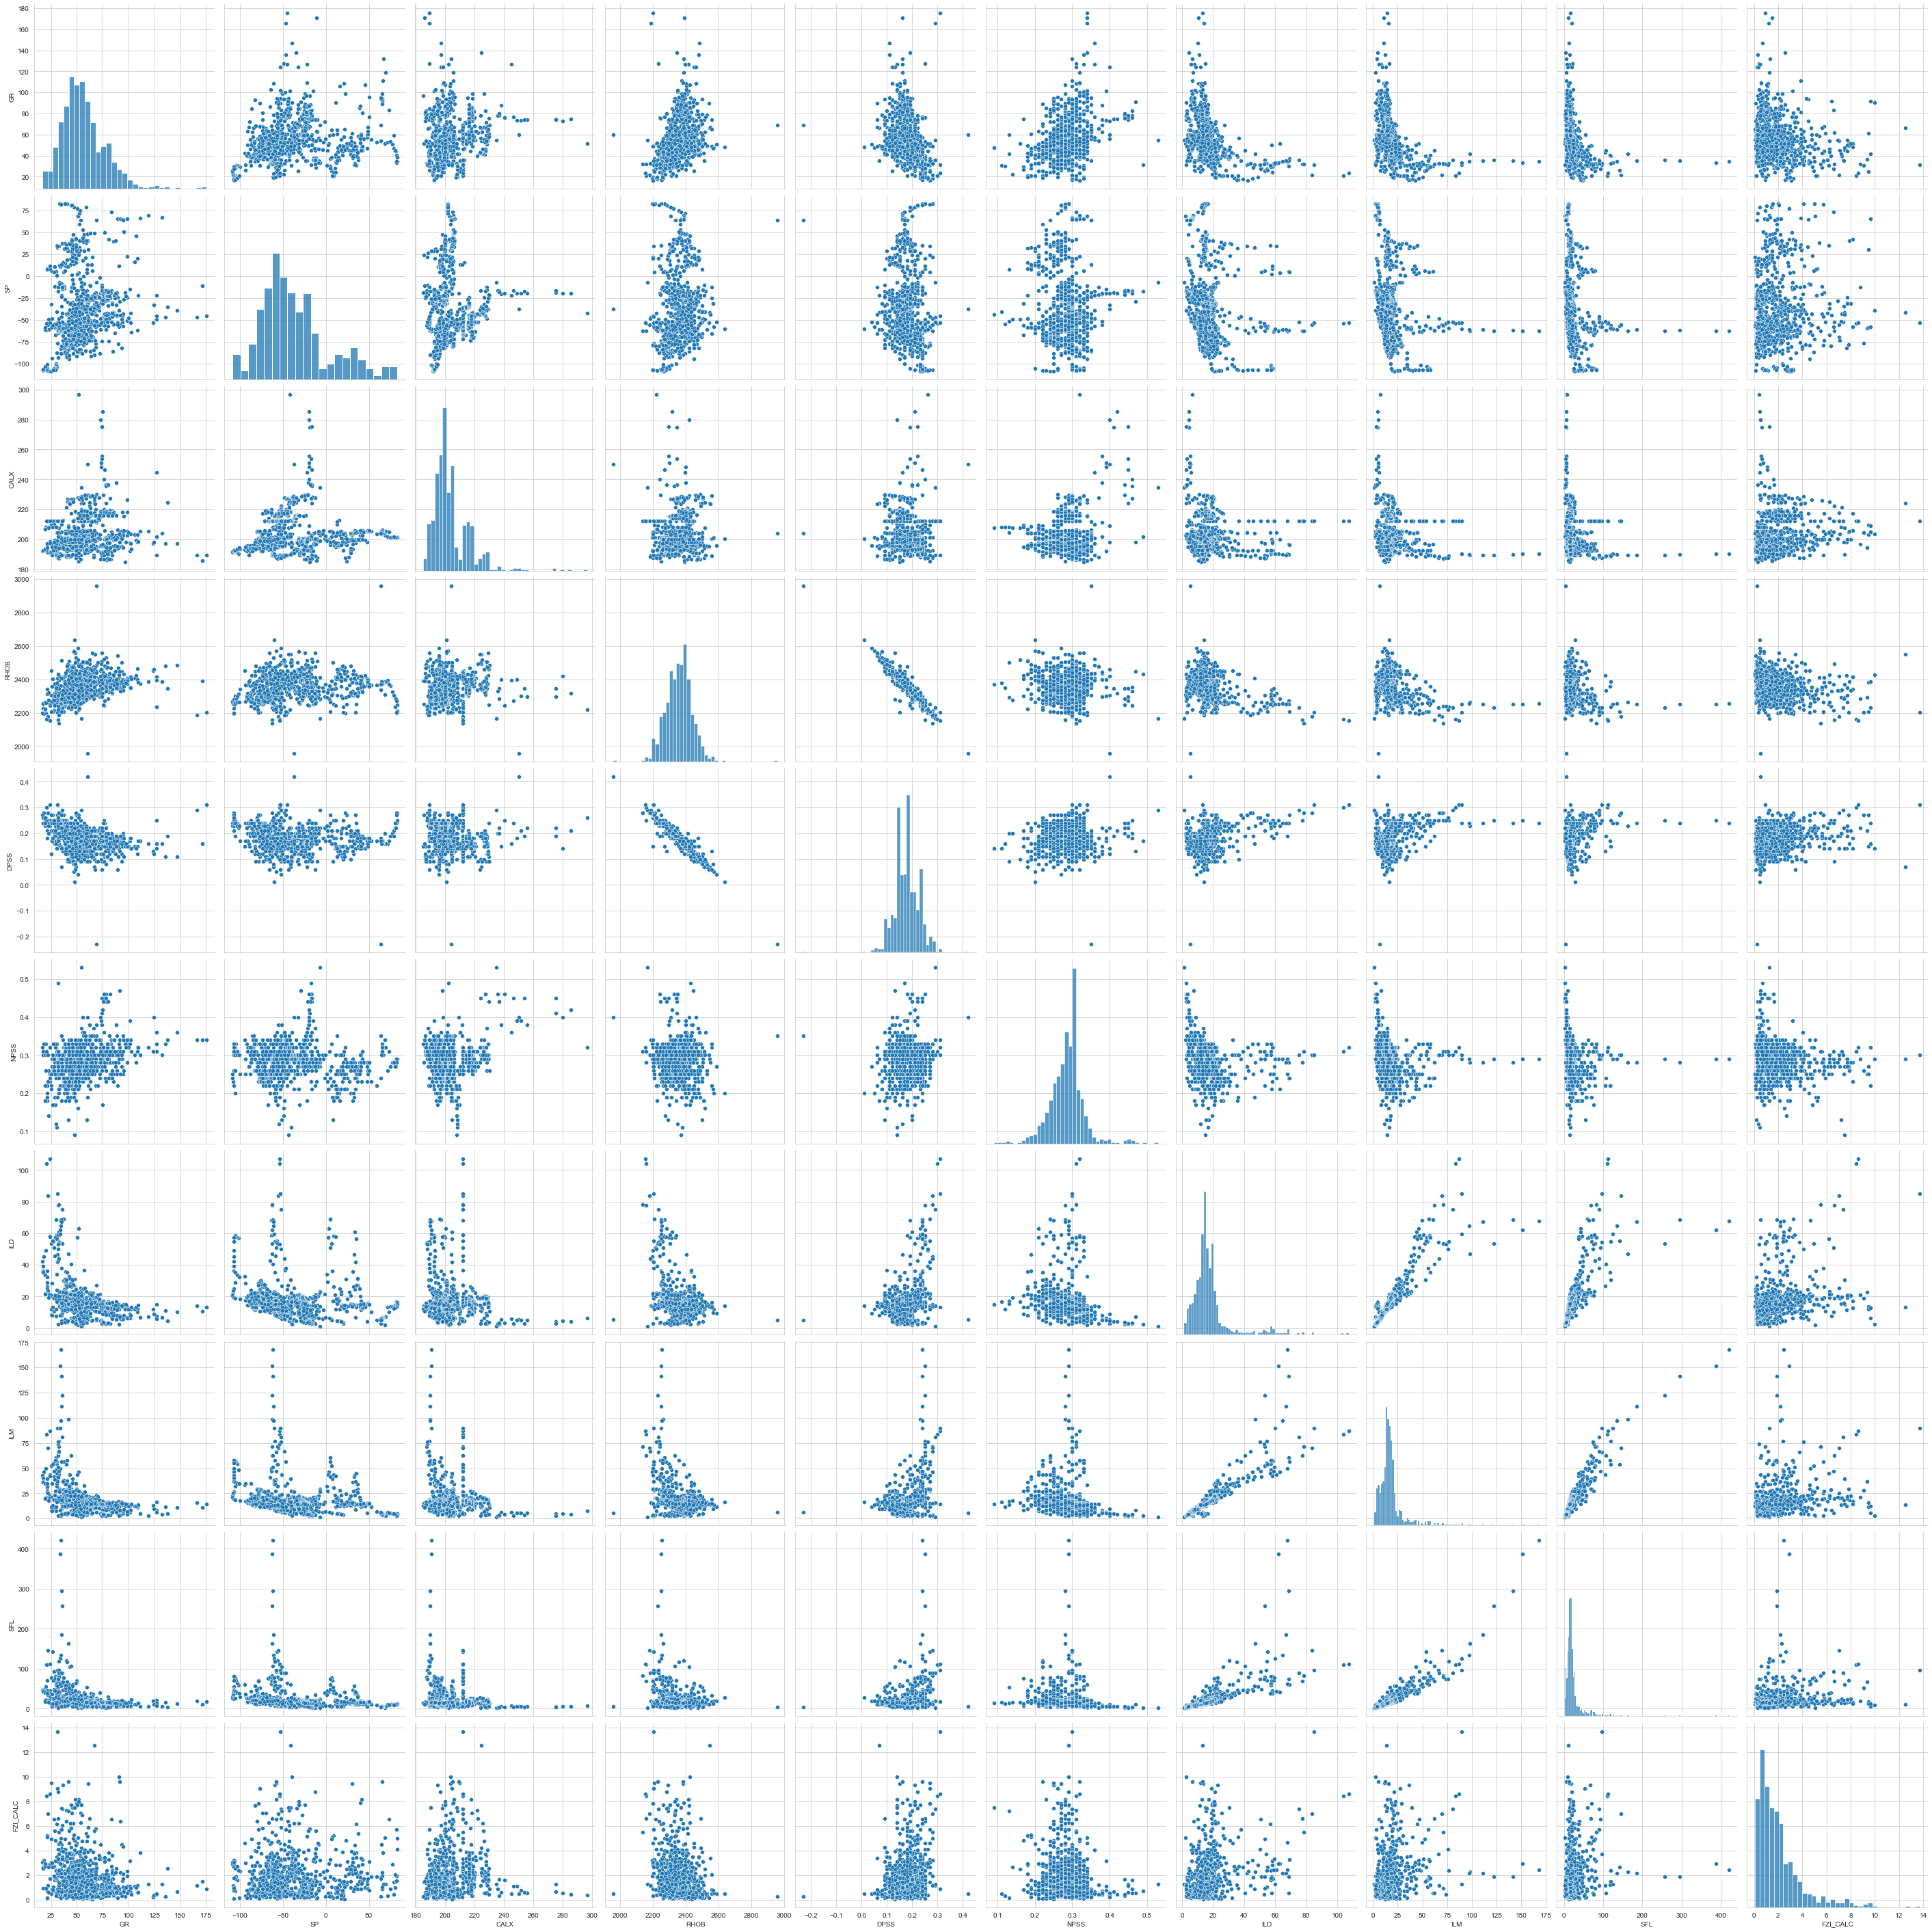

In [420]:
# a bivariate analysis (Pairplot) using seaborn
sns.set_style('whitegrid')
sns.pairplot(df,height=4)
plt.show()

Univariate distribution histograms occupy the diagonal from upper left to lower right.  Most exhibit a fairly skewed profile which may or may not be caused by outliers.  DPSS and RHOB exibit a strong negative correlation.  Most of the bivariate plots are well clustered with some scatter outside.

### CORRELATION

It is important to know the difference between correlation and causation.  Correlation is a measure of the extent of interdependence between variables,  and causation is the relationship between cause and effect between two variables. Pearson Correlation (#1) measures the linear dependence between two variables X and Y and is summarized:

    1. >0 and <=1 positive linear correlation, increasing towards 1 
    2. 0 (or near zero):, no correlation positive correlation 
    3. <0 and >= -1: negative linear correlation, increasing towards -1.
    
The P-value (#1) is the probability value that the correlation between two variables is statistically significant. By convention, a significance level of 0.05 is used (i.e. 95% confidence) to determine the correlation between the two variables is significant. Interpreting the p-values is as follows: p-value < 0.001: strong evidence that the correlation is significant. p-value < 0.05: there is moderate evidence that the correlation is statistically significant. p-value > 0.1: low evidence that the correlation is significant. p-value is > 0.1: no evidence that the correlation is significant.

1: https://en.wikipedia.org/wiki/P-value


<AxesSubplot:>

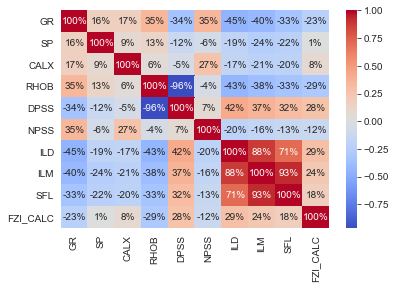

In [421]:
# annotated heatmap of above pearsons correlation
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='coolwarm')

In [422]:
# calculate p-value
from scipy import stats
# test input features with high Pearson Correlation for statistical significance
pearson_coef, p_value = stats.pearsonr(df['ILM'], df['ILD'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.883796841217729  with a P-value of P = 4.694412474216394e-273


In [423]:
# calculate p-value
# test input features with high Pearson Correlation for statistical significance
pearson_coef, p_value = stats.pearsonr(df['ILD'], df['SFL'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7132626808675095  with a P-value of P = 7.462505678024222e-129


In [424]:
# test input features with high Pearson Correlation for statistical significance
pearson_coef, p_value = stats.pearsonr(df['DPSS'], df['RHOB'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.9635714305903056  with a P-value of P = 0.0


Based on the correlation heatmap and p_value calculations above, the following can be inferred:

    'ILD', 'ILM' and 'SFL': 71 TO 93% positive correlation. All these are measurements are defined above, but each are essentially variations of the other.  ILD just measures more deeply into the formation than ILM and SFL.  P-values of <<< 0.05, suggest the correlation is statistical significant.
    
    'DPSS' and 'RHOB': 96% negative correlation .  DPSS is derived from RHOB and formation grain density so it is reasonable to expect a high degree of correlation.  P-values of 0 suggests no statistical significance, but intuitively, the two should be related.  These two associations may require further wrangling, but will be kept for now.

No inputs correlate well to the target ' FZI_CALC', with ILD and DPSS only modestly correlated to the target.


In [425]:
# delete columns that correlate too closely  - "colinearity"
df = df.drop(columns = ['ILM', 'SFL'])

# confirm change
df.describe()

,GR,SP,CALX,RHOB,DPSS,NPSS,ILD,FZI_CALC
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,56.478676,-36.158117,203.785899,2357.049295,0.177776,0.284192,17.877412,2.059417
std,21.141645,40.049282,12.642993,79.898105,0.048824,0.046944,12.761298,1.893674
min,16.650000,-108.420000,184.750000,1958.700000,-0.230000,0.090000,1.390000,0.090000
25%,42.455000,-63.160000,195.495000,2305.115000,0.150000,0.260000,12.025000,0.760000
50%,53.470000,-44.950000,200.465000,2359.520000,0.180000,0.280000,15.270000,1.540000
75%,66.700000,-19.700000,208.240000,2405.970000,0.210000,0.310000,19.460000,2.620000
max,175.620000,82.700000,296.550000,2959.800000,0.420000,0.530000,107.210000,13.690000


In [426]:
# save wrangled file for future use
df.to_csv(r'C:\Users\14038\jupyter_projects\Manyberries_FZI\FZI_regres_wrangle.csv', index=False)

## MODEL BUILD & OUTPUT

### FEATURE PREPROCESSING

In [427]:
from sklearn import preprocessing 
# label encoder converts labels into numeric form 
# so the machine can read the data
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# convert 'FM_TOP' data from categorical to numeric for correlation
# le = LabelEncoder()
# df['FM_TOP'] = le.fit_transform(df['FM_TOP'])

In [428]:
# Split the data for Training (_train) and Testing (_test)
# Train = 80%
# Test = 20%
from sklearn.model_selection import train_test_split

In [429]:
# separate input (y) and target (x) variables
# create _train and _test dataset for model
x = df.drop(columns=['FZI_CALC']) # input features
y = df['FZI_CALC'] # target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

There is a big difference in values and they will need to be scaled.  The Robust Scaler is suitable for datasets with a large number of outliers, whereas MinMax is a bit more 'all purpose' and suitable for distributions that are not necessarily normal.  In this instance we will apply MinMax

In [430]:
# rescale data using scaler that handles non gaussian and outlier better
# scale values using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0, 1))

x_train = minmax.fit_transform(x_train) # fit and transform
x_test = minmax.transform(x_test) # only transform the data

### MODEL RUN #1

We are going to follow the sklearn flow chart for regression with a few additional of my favorite algorithms as extras.  These could include:  SVR, RidgeRegression, Lasso, Linear Regression with Random Forest and KNN as add ons. 

In [431]:
# Linear Regression import and define as model
from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()
# train the data using above Linear Regression model
LRmodel.fit(x_train, y_train)

LinearRegression()

In [432]:
# make predictions with model
y_predicted = LRmodel.predict(x_test)

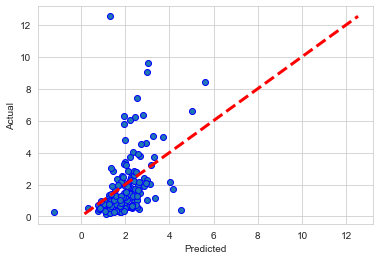

In [433]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [434]:
# model evaluation for testing set
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The LRmodel performance for testing set")
print("--------------------------------------")
print('MAE is {} VS 2.06 mean & 1.89 std'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The LRmodel performance for testing set
--------------------------------------
MAE is 1.135552149310992 VS 2.06 mean & 1.89 std
MSE is 2.997421683918197
R2 score is 0.19549053188562182


In [435]:
# SVR regressor
from sklearn.svm import SVR
SVRmodel = SVR(kernel='linear')
SVRmodel.fit(x_train, y_train)

# make predictions with model
y_predicted = SVRmodel.predict(x_test)

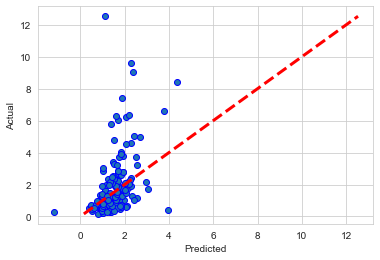

In [436]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [437]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The SVRmodel performance for testing set")
print("--------------------------------------")
print('MAE is {} VS 2.06 mean & 1.89 std'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The SVRmodel performance for testing set
--------------------------------------
MAE is 1.0375201144278852 VS 2.06 mean & 1.89 std
MSE is 3.185742893962547
R2 score is 0.14494502561258094


In [438]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
# train the data using Ridge
Ridge.fit(x_train, y_train)

# y make predictions with model
y_predicted = Ridge.predict(x_test)

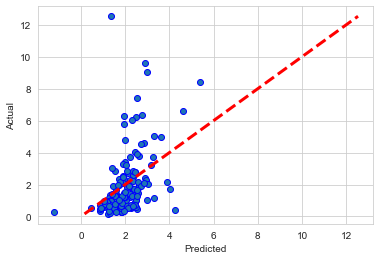

In [439]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [440]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The Ridge model performance for testing set")
print("--------------------------------------")
print('MAE is {} VS 2.06 mean & 1.89 std'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The Ridge model performance for testing set
--------------------------------------
MAE is 1.1497863935644426 VS 2.06 mean & 1.89 std
MSE is 3.012995870924127
R2 score is 0.19131041236100554


In [441]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(x_train, y_train)

# y make predictions with model
y_predicted = Lasso.predict(x_test)

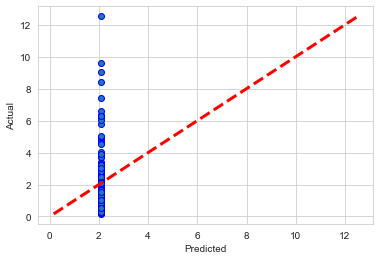

In [442]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [443]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The Lasso model performance for testing set")
print("--------------------------------------")
print('MAE is {} VS 2.06 mean & 1.89 std'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The Lasso model performance for testing set
--------------------------------------
MAE is 1.3715237174173345 VS 2.06 mean & 1.89 std
MSE is 3.7641246476941324
R2 score is -0.010292924242177648


In [444]:
# Random Forest import and define as model
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor()

# train the data using Random Forest
RFmodel.fit(x_train, y_train)

# y make predictions with model
y_predicted = RFmodel.predict(x_test)

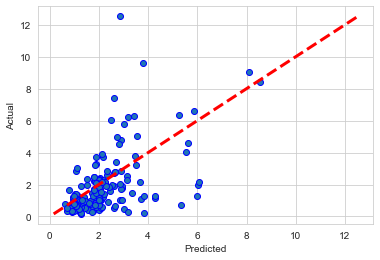

In [445]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [446]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The RF model performance for testing set")
print("--------------------------------------")
print('MAE is {} VS 2.06 mean & 1.89 std'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The RF model performance for testing set
--------------------------------------
MAE is 1.0522369696969698 VS 2.06 mean & 1.89 std
MSE is 2.6634656353333326
R2 score is 0.2851245011272753


In [447]:
from sklearn.neighbors import KNeighborsRegressor

KNNmodel = KNeighborsRegressor()

# train the data using Random Forest
KNNmodel.fit(x_train, y_train)

# y make predictions with model
y_predicted = KNNmodel.predict(x_test)

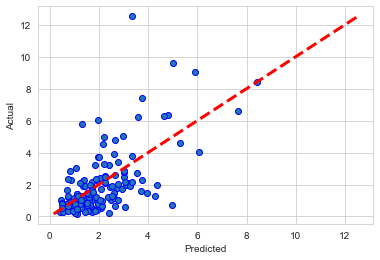

In [448]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [449]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The KNN model performance for testing set")
print("--------------------------------------")
print('MAE is {} VS 2.06 mean & 1.89 std'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The KNN model performance for testing set
--------------------------------------
MAE is 0.9791393939393939 VS 2.06 mean & 1.89 std
MSE is 2.1802732363636363
R2 score is 0.4148135809046235


None of the models scored particularly well using the r2 score with the best performers 0.25 to 0.33.  MAE was fair to poor relative to standard deviation and the mean.  On the predicted vs actual plot there was a fair amount of scatter.  Ridge was tried with both a linear (r2=0.15, MAE=1.15 and rbf kernel (r2=0.18, MAE=1.12).  Random Forest with r2=0.33 and MAE=1.11 and KNN with r2=0.3 and MAE=1.13.  SVR and Lasso will be omitted from the next round of modelling.

###  MODEL RUN #2:  Revisit Inputs

The dataset is far from an acceptable prediction so revisit the correlation and rewrangle the dataset.  From the correlation heatmap below and the above correlation discussion, DPSS will be removed.

<AxesSubplot:>

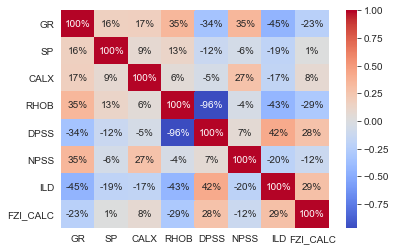

In [450]:
# remove inputs with low correlation and/or strongly correlate to other inputs
# revisit pearsons correlation
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='coolwarm')

In [451]:
# delete columns that correlate too closely  - "colinearity"
df = df.drop(columns = ['DPSS'])

# confirm change
df.head()
# save file for future use
df.to_csv(r'C:\Users\14038\jupyter_projects\Manyberries_FZI\FZI_regres_wrangle_model2.csv', index=False)

In [452]:
# Split the data for Training (_train) and Testing (_test)
# Train = 80%
# Test = 20%
# separate input (y) and target (x) variables
x = df.drop(columns=['FZI_CALC']) # input features
y = df['FZI_CALC'] # target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [453]:
# rescale data using scaler that handles non gaussian and outlier better
# scale values using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0, 1))

In [454]:
x_train = minmax.fit_transform(x_train) # fit and transform
x_test = minmax.transform(x_test) # only transform the data

In [455]:
# Linear Regression import and define as model
LRmodel2 = LinearRegression()

# train the data using above Linear Regression model
LRmodel2.fit(x_train, y_train)

LinearRegression()

In [456]:
# make predictions with model
y_predicted = LRmodel2.predict(x_test)

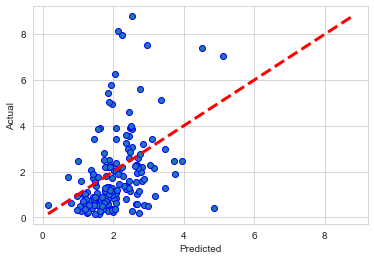

In [457]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [458]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The LR model 2 performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The LR model 2 performance for testing set
--------------------------------------
MAE is 1.1759183131160296
MSE is 2.537074086737354
R2 score is 0.1412833481162289


In [459]:
# Random Forest import and define as model
RFmodel2 = RandomForestRegressor()

# train the data using Random Forest
RFmodel2.fit(x_train, y_train)

# y make predictions with model
y_predicted = RFmodel2.predict(x_test)

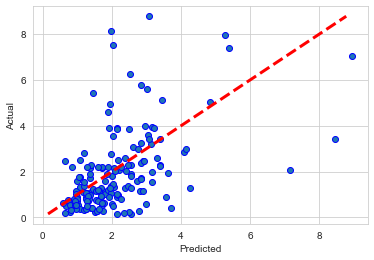

In [460]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [461]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The RF model 2 performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The RF model 2 performance for testing set
--------------------------------------
MAE is 1.0689212121212122
MSE is 2.3767226252121203
R2 score is 0.1955570766153023


In [462]:
KNNmodel2 = KNeighborsRegressor()

# train the data using Random Forest
KNNmodel2.fit(x_train, y_train)

# y make predictions with model
y_predicted = KNNmodel2.predict(x_test)

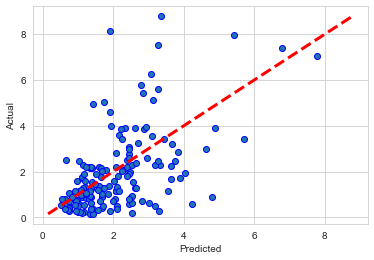

In [463]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [464]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The KNN model performance for testing set")
print("--------------------------------------")
print('MAE is {} VS 2.06 mean & 1.89 std'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The KNN model performance for testing set
--------------------------------------
MAE is 1.0144969696969697 VS 2.06 mean & 1.89 std
MSE is 2.086023175757576
R2 score is 0.2939493384909029


In [465]:
from sklearn.linear_model import Ridge
Ridge2 = Ridge()
# train the data using Ridge
Ridge2.fit(x_train, y_train)

# y make predictions with model
y_predicted = Ridge2.predict(x_test)

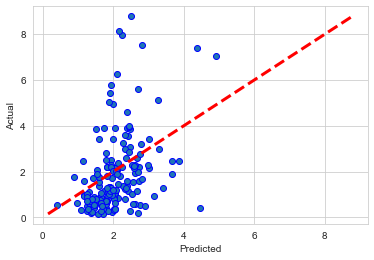

In [466]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [467]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The Ridge model performance for testing set")
print("--------------------------------------")
print('MAE is {} VS 2.06 mean & 1.89 std'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The Ridge model performance for testing set
--------------------------------------
MAE is 1.1753452052452231 VS 2.06 mean & 1.89 std
MSE is 2.5214284098074415
R2 score is 0.14657889836442328


The outcomes improved for Random Forest and KNN for r2 (0.37 and 0.4), but only slightly for MAE (approx 1).  Linear regression performed a little worse and Ridge regression was significantly worse

### MODEL RUN #3

Try the new dataset with RobustScaler instead to see if we can improve the outcome

In [468]:
# rescale data using scaler that handles non gaussian and outlierS better
# scale values using robust scaler 
from sklearn.preprocessing import RobustScaler
rbsc = RobustScaler()

In [469]:
x_train = rbsc.fit_transform(x_train) # fit and transform
x_test = rbsc.transform(x_test) # only transform the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [470]:
# Random Forest import and define as model
RFmodel3 = RandomForestRegressor()

# train the data using Random Forest
RFmodel3.fit(x_train, y_train)

# y make predictions with model
y_predicted = RFmodel3.predict(x_test)

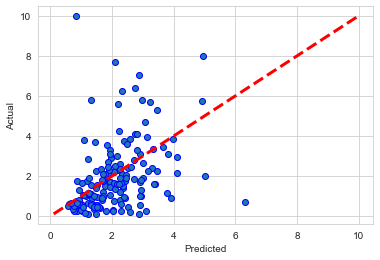

In [471]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [472]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The RF model 2 performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The RF model 2 performance for testing set
--------------------------------------
MAE is 1.0868606060606059
MSE is 2.631820807151515
R2 score is 0.09313821395927457


In [473]:
KNNmodel3 = KNeighborsRegressor()

# train the data using Random Forest
KNNmodel3.fit(x_train, y_train)

# y make predictions with model
y_predicted = KNNmodel3.predict(x_test)

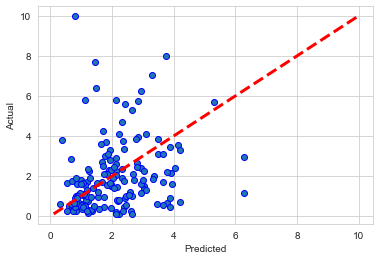

In [474]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [475]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The KNN model performance for testing set")
print("--------------------------------------")
print('MAE is {} VS 2.06 mean & 1.89 std'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The KNN model performance for testing set
--------------------------------------
MAE is 1.224169696969697 VS 2.06 mean & 1.89 std
MSE is 3.1854324363636364
R2 score is -0.09762296152652938


In [476]:
# Linear Regression import and define as model
LRmodel3 = LinearRegression()

# train the data using above Linear Regression model
LRmodel3.fit(x_train, y_train)

LinearRegression()

In [477]:
# make predictions with model
y_predicted = LRmodel3.predict(x_test)

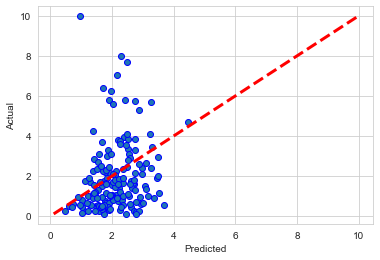

In [478]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [479]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The LR model 3 performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The LR model 3 performance for testing set
--------------------------------------
MAE is 1.224643724607532
MSE is 2.9426256221075953
R2 score is -0.013957606863796101


The outcomes were worse for Random Forest and KNN for r2 (0.006 and 0.08), but only slightly for MAE.  Linear Regression performed poorly as well.  RobustScaler will be exchanged for MinMax scaler. 

### MODEL 4: Input Transformations

Some of the data is very skewed (positively).  Outlier specific scaling such as robust scaling) did not work, so removing skewness prior to scaling is another approach.  We will use a threshold of 1 or -1.  It should be noted that SP is close to 1, but values are both negative and positive.  For this reason, it will be excluded from the transformation.

In [480]:
# skewness of data
df.skew()

GR          1.294231
SP          0.911826
CALX        2.297390
RHOB        0.379213
NPSS        0.466303
ILD         2.950419
FZI_CALC    2.071355
dtype: float64

In [481]:
# fix skewed input data with log function (useful for right skewed data)
df['log_GR'] = np.log(df['GR'])
df['log_CALX'] = np.log(df['CALX'])
df['log_ILD'] = np.log(df['ILD'])
# df['log_SP'] = np.sqrt(df['SP']) # ERROR invalid value encoutered in sqrt


In [482]:
df.describe()

,GR,SP,CALX,RHOB,NPSS,ILD,FZI_CALC,log_GR,log_CALX,log_ILD
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,56.478676,-36.158117,203.785899,2357.049295,0.284192,17.877412,2.059417,3.967822,5.315293,2.706362
std,21.141645,40.049282,12.642993,79.898105,0.046944,12.761298,1.893674,0.366426,0.058565,0.588693
min,16.650000,-108.420000,184.750000,1958.700000,0.090000,1.390000,0.090000,2.812410,5.219004,0.329304
25%,42.455000,-63.160000,195.495000,2305.115000,0.260000,12.025000,0.760000,3.748445,5.275535,2.486984
50%,53.470000,-44.950000,200.465000,2359.520000,0.280000,15.270000,1.540000,3.979121,5.300640,2.725890
75%,66.700000,-19.700000,208.240000,2405.970000,0.310000,19.460000,2.620000,4.200205,5.338691,2.968361
max,175.620000,82.700000,296.550000,2959.800000,0.530000,107.210000,13.690000,5.168323,5.692216,4.674790


In [483]:
# delete columns that correlate too closely  - "colinearity"
df = df.drop(columns = ['GR', 'CALX', 'ILD'])

# confirm change
df.head()

,SP,RHOB,NPSS,FZI_CALC,log_GR,log_CALX,log_ILD
0,-39.50,2378.71,0.31,2.21,3.835574,5.358330,1.444563
1,-42.00,2378.71,0.31,0.64,3.848018,5.360588,1.528228
2,-48.60,2405.00,0.36,4.04,4.019441,5.347441,1.834180
3,-50.40,2425.50,0.35,0.50,4.029984,5.329380,1.885553
4,-67.49,2312.50,0.25,3.24,4.042349,5.320372,2.688528


In [484]:
# save transformed data into new csv file
df.to_csv(r'C:\Users\14038\jupyter_projects\Manyberries_FZI\FZI_logtransform.csv', index=False)

In [485]:
# separate input (y) and target (x) variables
# create _train and _test dataset for model
x = df.drop(columns=['FZI_CALC']) # input features
y = df['FZI_CALC'] # target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [486]:
# rescale data using scaler that handles non gaussian and outlier better
# scale values using MinMax scaler
minmax = MinMaxScaler()

x_train = minmax.fit_transform(x_train) # fit and transform
x_test = minmax.transform(x_test) # only transform the data


In [487]:
# Random Forest import and define as model
RFmodel4 = RandomForestRegressor()

# train the data using Random Forest
RFmodel4.fit(x_train, y_train)

# y make predictions with model
y_predicted = RFmodel4.predict(x_test)

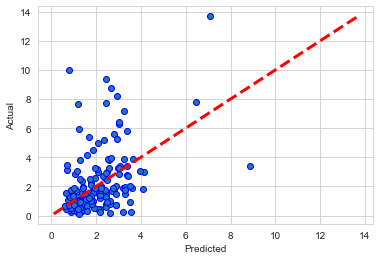

In [488]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [489]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The RF model 2 performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The RF model 2 performance for testing set
--------------------------------------
MAE is 1.2644763636363636
MSE is 3.809546995272727
R2 score is 0.18572482878173635


In [490]:
KNNmodel4 = KNeighborsRegressor()

# train the data using Random Forest
KNNmodel4.fit(x_train, y_train)

# y make predictions with model
y_predicted = KNNmodel4.predict(x_test)

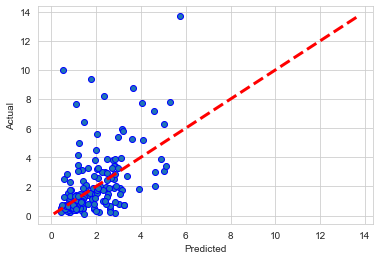

In [491]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [492]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The KNN model performance for testing set")
print("--------------------------------------")
print('MAE is {} VS 2.06 mean & 1.89 std'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The KNN model performance for testing set
--------------------------------------
MAE is 1.1687030303030304 VS 2.06 mean & 1.89 std
MSE is 3.536375709090909
R2 score is 0.24411407981437483


In [493]:
# Linear Regression import and define as model
LRmodel3 = LinearRegression()

# train the data using above Linear Regression model
LRmodel3.fit(x_train, y_train)

LinearRegression()

In [494]:
# make predictions with model
y_predicted = LRmodel3.predict(x_test)

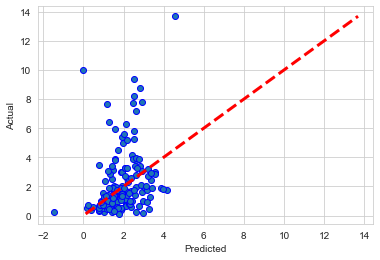

In [495]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [496]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The LR model 3 performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The LR model 3 performance for testing set
--------------------------------------
MAE is 1.357408451671071
MSE is 4.383158321601848
R2 score is 0.06311774149839855


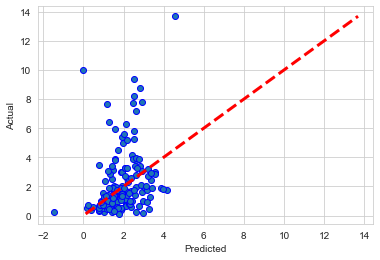

In [497]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Overall results were a poorer using a log transformation on the data for all algorithms.  Random Forest was the best with MAE of 1.09 and r2=0.3.  KNN and Linear regression performed significantly poorer than RF.  It should be noted that the target is highly skewed and I was unable to transform the skewed SP input (error message).  Both of these factors could be why this model run did not produce better results. 

### MODEL #5 ADDRESS OUTLIERS

In [498]:
# reload previous file that does not have log transformations
df = pd.read_csv('FZI_regres_wrangle_model2.csv')

#confirm
df.head()

,GR,SP,CALX,RHOB,NPSS,ILD,FZI_CALC
0,46.32,-39.50,212.37,2378.71,0.31,4.24,2.21
1,46.90,-42.00,212.85,2378.71,0.31,4.61,0.64
2,55.67,-48.60,210.07,2405.00,0.36,6.26,4.04
3,56.26,-50.40,206.31,2425.50,0.35,6.59,0.50
4,56.96,-67.49,204.46,2312.50,0.25,14.71,3.24


In [499]:
df.skew()

GR          1.294231
SP          0.911826
CALX        2.297390
RHOB        0.379213
NPSS        0.466303
ILD         2.950419
FZI_CALC    2.071355
dtype: float64

In [500]:
# remove outliers using 3 standard deviations as threshold
upper = df.mean() +3*df.std()
lower = df.mean() -3*df.std()
print(upper)
print(lower)

GR           119.903611
SP            83.989728
CALX         241.714878
RHOB        2596.743609
NPSS           0.425023
ILD           56.161307
FZI_CALC       7.740438
dtype: float64
GR            -6.946260
SP          -156.305962
CALX         165.856920
RHOB        2117.354981
NPSS           0.143361
ILD          -20.406483
FZI_CALC      -3.621605
dtype: float64


In [501]:
# deal with outliers by assigning values outside 3std 
# NOTE: GR can not be <0
df['GR'] = np.where((df.GR < 0), 0, df.GR)
df['GR'] = np.where((df.GR > 119.903611), 119.903611, df.GR)


In [502]:
df['SP'] = np.where((df.SP < -156.305962), -156.305962, df.SP)
df['SP'] = np.where((df.SP > 83.989728), 83.989728, df.SP)

In [503]:
df['CALX'] = np.where((df.CALX < 165.856920), 165.856920, df.CALX)
df['CALX'] = np.where((df.CALX > 241.714878), 241.714878, df.CALX)

In [504]:
df['RHOB'] = np.where((df.RHOB < 2117.354981), 2117.354981, df.RHOB)
df['RHOB'] = np.where((df.RHOB > 2596.743609), 2596.743609, df.RHOB)

In [505]:
# ILD 
# NOTE:  RESISITIVTY OR ILD CAN NOT BE <0)
df['ILD'] = np.where((df.ILD < 0), 0, df.ILD)
df['ILD'] = np.where((df.ILD > 56.161307), 56.161307, df.ILD)

In [506]:
# CONFIRM CHANGES
df.describe()

,GR,SP,CALX,RHOB,NPSS,ILD,FZI_CALC
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,56.168242,-36.158117,203.467963,2356.752384,0.284192,17.464969,2.059417
std,19.897905,40.049282,11.154582,76.571133,0.046944,10.967048,1.893674
min,16.650000,-108.420000,184.750000,2117.354981,0.090000,1.390000,0.090000
25%,42.455000,-63.160000,195.495000,2305.115000,0.260000,12.025000,0.760000
50%,53.470000,-44.950000,200.465000,2359.520000,0.280000,15.270000,1.540000
75%,66.700000,-19.700000,208.240000,2405.970000,0.310000,19.460000,2.620000
max,119.903611,82.700000,241.714878,2596.743609,0.530000,56.161307,13.690000


In [507]:
# Split the data for Training (_train) and Testing (_test)
# Train = 80%
# Test = 20%
# separate input (y) and target (x) variables
x = df.drop(columns=['FZI_CALC']) # input features
y = df['FZI_CALC'] # target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [508]:
# rescale data using scaler that handles non gaussian and outlier better
# scale values using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0, 1))

In [509]:
x_train = minmax.fit_transform(x_train) # fit and transform
x_test = minmax.transform(x_test) # only transform the data

In [510]:
# Random Forest import and define as model
RFmodel5 = RandomForestRegressor()

# train the data using Random Forest
RFmodel5.fit(x_train, y_train)

# y make predictions with model
y_predicted = RFmodel5.predict(x_test)

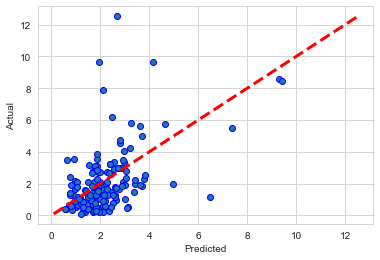

In [511]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [512]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The RF model 5 performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The RF model 5 performance for testing set
--------------------------------------
MAE is 1.1015284848484848
MSE is 2.7841503287272724
R2 score is 0.25255617313677925


In [513]:
KNNmodel5 = KNeighborsRegressor()

# train the data using Random Forest
KNNmodel5.fit(x_train, y_train)

# y make predictions with model
y_predicted = KNNmodel5.predict(x_test)

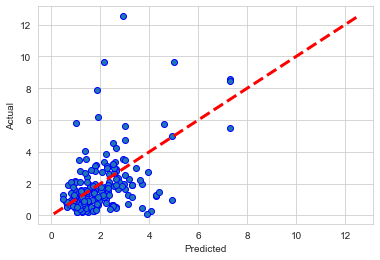

In [514]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [515]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The KNN model 5 performance for testing set")
print("--------------------------------------")
print('MAE is {} VS 2.06 mean & 1.89 std'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The KNN model 5 performance for testing set
--------------------------------------
MAE is 1.1422303030303032 VS 2.06 mean & 1.89 std
MSE is 3.0001454060606063
R2 score is 0.19456929451178573


Removing outliers (3 standard deviations) did not improve the model over the second iteration for both KNN and RF.    

### RESULTS

The first iteration with MinMax scaling had poor performancewith Random Forest Regressor, KNN and Linear Regression relatively the best (r2 from 0.25 to 0.33).  MAE was a little above one, but with a mean of 2.06 mean & 1.89 std, those values were not very good.  The second model run revisited the inputs and removed highly correlated to RHOB input DPSS.  The results improved substantially with the Random Forest and KNN as the best performers (r2=0.4 and0.37) and a slight reduction MAE to 1.1.  The data is skewed and appeared to have a large number of potential outliers.  RobustScaler was applied for the third model run.  The results were substantially worse than all previous model runs for all algorithms.  Log transformations were applied to high skewed inputs (>1 or <-1).  SP was close to 1 at 0.9, but an attempt to log and square root transform that value resulted in errors (null values).  Overall for log tranformation results were a poorer using a log transformation on the data for all algorithms. Random Forest was the best with MAE of 1.09 and r2=0.3. Removing outlier data by assigning values outside 3 standard deviations gave slightly poorer results than model #2 results.  
Given the low r2 value, no hyperparameter tuning was performed since it likely would not improved the model much more.  

Random Forest metrics for model#2 (as of writing):
    
    MAE is 0.91
    MSE is 1.66
    R2 score is 0.41
    
Random Forest Regressor has consistently performed the best with KNN a close second.  The RFmodel will be saved in the event that new methods to wrangle or preprocess the data can be implemented to get a better model.


In [517]:
import pickle
RFmodel2.fit(x_train, y_train)
# save the model to disk
filename = 'RFmodel2_model_FZI_regression.sav'
pickle.dump(RFmodel2, open(filename, 'wb'))

## CONCLUSIONS

Based on the above results, the the prediction of FZI using wireline logging data was not particularly successful.  Although, the MAE of a little less than 1 was achievable, and it is well below one standard deviation.  However, the FZI values are heavily skewed to the right meaning the bulk of the values are on the low end of the distribution (i.e. between 1 and 3; see boxplot).  With a value between 1 and 3, and error of +/- 1, that is significant.  For the values beyond 6, that are mostly flagged as possible outliers, an error of approximately 1 would not be that signifcant.  

One reason for the error, is that there is intrinsic error related to the inputs (wireline log data) and the target (core analysis).  Wireline logs are collected using tools from companies that do essentially the same thing, but vary ever so slightly.  Core analysis measurements (porosity and permeability) fundamental to the FZI calculation are subject to quality control variance from lab to lab.  In addition, permeability can be measured using slightly different techniques and almost never uses the fluid/phase that is actually in the reservoir.  All of these can create inaccuracy within the dataset and with a small number of data points, they may be too large to get to MAE significantly lower.  The data is closely related and all measured inputs so with a large enough dataset, those inaccuracies should be averaged out and allow for the model to produce a better result.

One other issue with respect to model and data is the relationship of porosity and permeability (the primary inputs to the FZI calculation) varies with different formations.  Some zones can have high porosity and low permeability (i.e. the connection between pore space) while others can have fair porosity and good permeability.  How the components of a rock arrange themselves depending on the rock type and what has happened to the rock since deposition.  FM_TOP is the reference to the various zones and a model run (not shown in this book) was made as part of the EDA, but removed when the output was quite poor.  In addition, there were two reasons why it was not included in this modelling:  
    1. There are several zones in the dataset and the count for each was greatly imbalanced to reflect any meaningful affect on the output.  In fact, the imbalanced could create bias.
    2.  It was unclear if the categorical to numeric classification should be ordinal or strictly numeric with no rank.  Some zones are clearly better than others, but should the other numeric inputs speak to that fact.

If the model was succesful, it would make a Geologist and Reservoir Engineer's more effective at their job and the advice they provide to their company.  The ability to quantify the reservoir's flow capacity is a fundamental aspect of oil and gas development.  If the error could be reduced by a factor of 2 and r2 > 0.5, these models could form the basis for reservoir modelling and better plan the development of a pool.  It could also help identify bypassed pay (missed opportunities).  

Binning the FZI values into groups could reduce the affect of inaccuracy built into the dataset, both on the wireline used as inputs and core data used to calculate FZI.  FZI values are positively skewed so binning will reflect distribution within the dataset.

### RECOMMENDATIONS

1. Creating bins using unsupervised techniques such as kmeans or dbscan could be a better alternative for predicting FZI.  Using the input features to create the classes in the absence of a binned or calculated FZI value and then comparing to the labelled target data.
2. Calibration of reservoir quality and FZI could be improved by including production values as inputs to create the binned values first and then calibrate back to wireline logs might improve the model accuracy.  
3. Expand the dataset so it could be on algorithms that typically work better with larger data sizes.
4. DT (sonic) is a useful input since it is used to calculate porosity, but in this case it was far too punitive to keep and remove the rows that had missing values.  If the dataset were to increase significantly, a separate model could be initiated using DT in the dataset.
5. Data transformations specific to each input were attempted (log transformation), but there may be others that are more useful to help reduce the skewness/outlier affect.  In addition, the target is highly skewed and that could have a negative impact on the result.